## **RADI605: Modern Machine Learning**

### Assignment: Random Forests
**Romen Samuel Rodis Wabina** <br>
Student, PhD Data Science in Healthcare and Clinical Informatics <br>
Clinical Epidemiology and Biostatistics, Faculty of Medicine (Ramathibodi Hospital) <br>
Mahidol University

Note: In case of Python Markdown errors, you may access the assignment through this GitHub [Link](https://github.com/rrwabina/RADI605/blob/main/05%20Adaptive%20Boosting/scripts/assignment.ipynb)

### RF Assignment No. 1: <code>From the given data, create a random forest with T=3, OOB rate = 20\%, and initialize any additional parameters that may be needed.</code>

| Sample M  | Gene #1       | Gene #2         | Gene #3         | Class           |
|:---------:|---------------|-----------------|-----------------|-----------------|
| 1         | -3            | 1               | 6               | 1               |
| 2         | 3             | -1              | 6               | 1               |
| 3         | 6             | 1               | 12              | 1               |
| 4         | 1             | 0               | 2               | -1              |
| 5         | 0             | 1               | 0               | -1              |

**Solution:**
Out of the total number of samples in the data, 20% of the samples will be left out for Out-of-Bag (OOB) error calculation. So, for the given data with 5 samples, we will have 1 sample as OOB. Then, the original data will be bootstrapped to create $T = 3$ bootstrapped datasets. Suppose our OOB sample is sample 4:

| Sample M  | Gene #1       | Gene #2         | Gene #3         | Class           |
|:---------:|---------------|-----------------|-----------------|-----------------|
| 4         | 1             | 0               | 2               | -1              |

Bootstrapping: To create $T = 3$ bootstrapped datasets, we will randomly sample with replacement from the original data T times. Each bootstrapped dataset will have the same number of samples as the original data. Suppose bootstrapped dataset $D_1$ is the following:

| Sample M  | Gene #1       | Gene #2         | Gene #3         | Class           |
|:---------:|---------------|-----------------|-----------------|-----------------|
| 1         | -3            | 1               | 6               | 1               |
| 2         | 3             | -1              | 6               | 1               |
| 4         | 1             | 0               | 2               | -1              |
| 5         | 0             | 1               | 0               | -1              |
| 4         | 1             | 0               | 2               | -1              |

To calculate the Gini index and Gini gain for bootstrapped $D_1$, we will first calculate the Gini index for each feature (Gene #1, Gene #2, Gene #3) and use the Gini gain to determine the best feature to split the data at the root node.

### Root Node: The Gini index measures the impurity of a set of samples. For a binary classification problem, the Gini index can be calculated as follows:

\begin{equation*}
\begin{aligned}
    \text{Gini}(D_1)    &= 1 - \sum_{j = 1}^{L}p^2_j \\
                        &= 1 - (0.4)^2 - (0.4)^2 \\
                        &= 1 - 0.32 \\
    \text{Gini}(D_1)    &= 0.48
\end{aligned}
\end{equation*}

Calculate the gini gain for each feature, which is the reduction in the gini index after splitting the data on the feature. For example, if we split the data on Gene #1, we would get two subsets of the data: one subset where Gene #1 is less than a threshold and another subset where Gene #1 is greater than the threshold. To calculate gini gain, we need to calculate the weighted average of the gini indices of the two subsets, where the weights are the proportions of samples in each subset. 

### Splits on Gene #1
Next, we'll calculate the gini gain for Gene #1. The split on Gene #1 is -3.
- $\text{Class 1}  \rightarrow \frac{0}{1} = 0$ and $\text{Class -1} \rightarrow \frac{1}{1} = 1 $

Therefore, 
\begin{equation*}
\begin{aligned}
    \text{Gini index split}(D_1)    &= 1 - \sum_{j = 1}^{L}p^2_j \\
                              &= 1 - (0)^2 - (1)^2 \\
                              &= 1 - 1 \\
    \text{Gini index split}(D_1)    &= 0
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    \text{Gini Gain split}(D_1)    &= \text{Gini}(D_1) - \sum_{i = 1}^{n} \frac{|D_{1i}|}{|D_1|} \text{Gini}(D_1i)\\
                                   &= 0.48 - (1/5) \cdot 0 - (4/5) \cdot 0.48 \\
    \text{Gini Gain split}(D_1)    &= 0.24
\end{aligned}
\end{equation*}

We'll repeat the calculation for the gini gain for Gene #1 where the split on Gene #1 is 3.
- $\text{Class 1}  \rightarrow \frac{1}{2} = 0.5$ and $\text{Class -1} \rightarrow \frac{0}{2} = 0 $

Therefore, 
\begin{equation*}
\begin{aligned}
    \text{Gini index split}(D_1)    &= 1 - \sum_{j = 1}^{L}p^2_j \\
                                    &= 1 - (0.5)^2 - (0)^2 \\
    \text{Gini index split}(D_1)    &= 0.5
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    \text{Gini Gain split}(D_1)    &= \text{Gini}(D_1) - \sum_{i = 1}^{n} \frac{|D_{1i}|}{|D_1|} \text{Gini}(D_1i)\\
                                   &= 0.48 - (2/5) \cdot 0 - (3/5) \cdot 0.48 \\
    \text{Gini Gain split}(D_1)    &= 0.072
\end{aligned}
\end{equation*}

Finally, calculate the gini gain for Gene #1 where the split on Gene #1 is 1.
- $\text{Class 1}  \rightarrow \frac{1}{2} = 0.5$ and $\text{Class -1} \rightarrow \frac{1}{2} = 0.5 $

Therefore, 
\begin{equation*}
\begin{aligned}
    \text{Gini index split}(D_1)    &= 1 - \sum_{j = 1}^{L}p^2_j \\
                                    &= 1 - (0.5)^2 - (0.5)^2 \\
    \text{Gini index split}(D_1)    &= 0.5
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    \text{Gini Gain split}(D_1)    &= \text{Gini}(D_1) - \sum_{i = 1}^{n} \frac{|D_{1i}|}{|D_1|} \text{Gini}(D_1i)\\
                                   &= 0.48 - (2/5) \cdot 0.5 - (3/5) \cdot 0.48 \\
    \text{Gini Gain split}(D_1)    &= 0.072
\end{aligned}
\end{equation*}

The split for value 0 in Gene #1 was not included because, in the calculation of gini gain, it resulted in a negative gain value. The CART algorithm used in Random Forest only chooses the split that results in the highest positive gain value. As a result, a split for value 0 in Gene #1 was not included. Since Gene #1 has the highest gini gain when split on value = $-3$, we'll use that split for the root of the tree.
The tree would look like:

                                                (Gene #1 <= 1.5)
                                                         |
                                                         |
                                _________________________|________________________
                               |                                                  |
                               |                                                  |
                       (Gene #3 <= 5.5)                                     (Gene #3 > 5.5)
                               |                                                  |
                               |                                                  |
                     __________|__________                                        |
                    |                     |                                       |
                    |                     |                                       |
              (Class = -1)          (Class = 1)                              (Class = 1)


### Splits on Gene #2
Next, we'll calculate the gini gain for Gene #2. The split on Gene #2 is -1.

\begin{equation*}
\begin{aligned}
    \text{Gini index split}(D_1)    &= 1 - \sum_{j = 1}^{L}p^2_j \\
                                    &= 1 - (0.75)^2 - (0.25)^2 \\
    \text{Gini index split}(D_1)    &= 0.375
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    \text{Gini index split}(D_1)    &= 1 - \sum_{j = 1}^{L}p^2_j \\
                                    &= 1 - (0.50)^2 - (0.50)^2 \\
    \text{Gini index split}(D_1)    &= 0.50
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    \text{Gini Gain split}(D_1)    &= \text{Gini}(D_1) - \sum_{i = 1}^{n} \frac{|D_{1i}|}{|D_1|} \text{Gini}(D_1i)\\
                                   &= 0.375 - (4/8) \cdot 0.375 - (4/8) \cdot 0.50 \\
    \text{Gini Gain split}(D_1)    &= 0.0625
\end{aligned}
\end{equation*}

The split on Gene #2 is 1.

\begin{equation*}
\begin{aligned}
    \text{Gini index split}(D_1)    &= 1 - \sum_{j = 1}^{L}p^2_j \\
                                    &= 1 - (0.67)^2 - (0.33)^2 \\
    \text{Gini index split}(D_1)    &= 0.444
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    \text{Gini index split}(D_1)    &= 1 - \sum_{j = 1}^{L}p^2_j \\
                                    &= 1 - (0.40)^2 - (0.60)^2 \\
    \text{Gini index split}(D_1)    &= 0.48
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    \text{Gini Gain split}(D_1)    &= \text{Gini}(D_1) - \sum_{i = 1}^{n} \frac{|D_{1i}|}{|D_1|} \text{Gini}(D_1i)\\
                                   &= 0.44444444 - (3/8) \cdot 0.44444444 - (5/8) \cdot 0.44444444 \\
    \text{Gini Gain split}(D_1)    &= 0.01111111
\end{aligned}
\end{equation*}


                                                (Gene #2 <= 0.5)
                                                         |
                                                         |
                                _________________________|___________________________
                               |                                                     |
                               |                                                     |
                        (Gene #3 <= 5.5)                                     (Gene #3 > 5.5)
                               |                                                     |
                               |                                                     |
                     __________|__________                                           |
                    |                     |                                          |
                    |                     |                                          |
               (Class = 1)           (Class = -1)                              (Class = 1)


### Splits on Gene #3
Finally, we'll calculate the gini gain for Gene #3. The split on Gene #3 is 2.

\begin{equation*}
\begin{aligned}
    \text{Gini index split}(D_1)    &= 1 - \sum_{j = 1}^{L}p^2_j \\
                                    &= 1 - (1.0)^2 - (0)^2 \\
    \text{Gini index split}(D_1)    &= 0
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    \text{Gini index split}(D_1)    &= 1 - \sum_{j = 1}^{L}p^2_j \\
                                    &= 1 - (1.0)^2 - (0)^2 \\
    \text{Gini index split}(D_1)    &= 0
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    \text{Gini Gain split}(D_1)    &= \text{Gini}(D_1) - \sum_{i = 1}^{n} \frac{|D_{1i}|}{|D_1|} \text{Gini}(D_1i)\\
                                   &= 0 - (2/8) \cdot 0 - (6/8) \cdot 0.48 \\
    \text{Gini Gain split}(D_1)    &= -0.12
\end{aligned}
\end{equation*}


The highest gini gain was obtained from Gene #2 with a split at -1, so the first split of the tree will be based on Gene #2 and split at -1.

                                                (Gene #3 <= 5.5)
                                                         |
                                                         |
                                _________________________|____________________________
                               |                                                      |
                               |                                                      |
                       (Gene #2 <= 0.5)                                     (Gene #2 > 0.5)
                               |                                                      |
                               |                                                      |
                     __________|__________                                            |
                    |                     |                                           |
                    |                     |                                           |
              (Class = -1)           (Class = 1)                                (Class = 1)


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from time import time
from numpy import mean
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.plotting import plot_learning_curves
from statsmodels.stats.outliers_influence import variance_inflation_factor
from time import time
from scipy.stats import chi2_contingency

import random
import warnings
warnings.filterwarnings('ignore')

Let's just try the given dataset in Python to see additional insights.

In [10]:
X = np.array([[-3, 1, 6], [3, -1, 6], [6, 1, 12], [1, 0, 2], [0, 1, 0]])
y = np.array([1, 1, 1, -1, -1])

assert X.shape[0] == y.shape[0]
model = RandomForestClassifier(n_estimators = 100, 
                               random_state = 4, 
                               oob_score = True, 
                               max_features = 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
forest = model.fit(X_train, y_train)
y_pred = forest.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)

print('Confusion Matrix : \n',confusion)
print(classification_report(y_test, y_pred))

Confusion Matrix : 
 [[0 1]
 [0 1]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



As expected, the dataset needs more samples to generate a better classification performance. 

### RF Assignment No. 2: <code> Question 1-2. Please select one dataset from [UCI](https://archive.ics.uci.edu/ml/index.php). Describe the data characteristics by using appropriate statistical techniques. </code> 

We chose the Thoracic Surgery Dataset that is related to the post-operative life expectancy in the lung cancer patients. It consists of binary labels where 1-death within one year after surgery (i.e., Surgery Risk) and 0 as survival (i.e., Survival). According to its data source, the data was collected at Wroclaw Thoracic Surgery Center for patients who underwent major lung resections. The dataset consists of 16 features with 1 class (i.e., <code>Risk1Yr</code>). It contains no missing values and the dataset is already cleaned upon retrieval. Therefore, we don't need to preprocess it further. You may download the dataset [here](https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data).

In [24]:
def convert_binary(df, columns = ['Risk1Yr']):
    for column in columns:
        df[column] = df[column].apply(lambda x: 0 if x == 'F' else 1)
    return df

def load_thoracic(path = '../data/ThoraricSurgery.csv'):
    data = pd.read_csv(path)
    data = data[data.columns[2:]]
    data = data.drop(['PRE6', 'PRE14'], axis = 1)
    label_columns = data.columns[2:12]
    data = convert_binary(data, columns = ['Risk1Yr'])
    data = convert_binary(data, columns = label_columns)
    include_columns = data.columns[0:-1]
    X, y = data[include_columns], data['Risk1Yr']
    X, y = X.to_numpy(), y.to_numpy()
    y[y == 0] = -1
    return X, y, data

X, y, data = load_thoracic()

In [3]:
data.columns.values 

array(['PRE4', 'PRE5', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17',
       'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE', 'Risk1Yr'], dtype=object)

Attribute Information:

1. DGN: Diagnosis: Specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any.
2. PRE4: Forced vital capacity - FVC (numeric)
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)
5. PRE7: Pain before surgery (T,F)
6. PRE8: Haemoptysis before surgery (T,F)
7. PRE9: Dyspnoea before surgery (T,F)
8. PRE10: Cough before surgery (T,F)
9. PRE11: Weakness before surgery (T,F)
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)
11. PRE17: Type 2 DM - diabetes mellitus (T,F)
12. PRE19: MI up to 6 months (T,F)
13. PRE25: PAD - peripheral arterial diseases (T,F)
14. PRE30: Smoking (T,F)
15. PRE32: Asthma (T,F)
16. AGE: Age at surgery (numeric)
17. Risk1Y: 1 year survival period - (T)rue value if died (T,F)

We utilized the summary statistics to calculate the coefficient of variation $cv$ of every feature. Results have shown that the feature <code>PRE19</code> indicates the largest variability in the data, relative to thhe mean, with $cv = 15.31$. This suggests that this feature are spread out over a large range - indicating either high heterogeneity or a large amount of noise in the data. The <code>PRE19</code>, having the largest variation, may indicate that the data may be difficult to interpret and not be representative of the underlying process. The forced vital capacity, denoted as <code>PRE4</code>, has the least variation among the independent variables.

In [4]:
describe = pd.DataFrame(data.describe())
mean, std = describe.iloc[1], describe.iloc[2]
describe.loc['cv'] = std / mean
describe[describe.columns[:-1]]

PRE4        PRE5        PRE7        PRE8        PRE9       PRE10  \
count  470.000000  470.000000  470.000000  470.000000  470.000000  470.000000   
mean     3.281638    4.568702    0.065957    0.144681    0.065957    0.687234   
std      0.871395   11.767857    0.248472    0.352154    0.248472    0.464114   
min      1.440000    0.960000    0.000000    0.000000    0.000000    0.000000   
25%      2.600000    1.960000    0.000000    0.000000    0.000000    0.000000   
50%      3.160000    2.400000    0.000000    0.000000    0.000000    1.000000   
75%      3.807500    3.080000    0.000000    0.000000    0.000000    1.000000   
max      6.300000   86.300000    1.000000    1.000000    1.000000    1.000000   
cv       0.265537    2.575755    3.767159    2.434003    3.767159    0.675336   

            PRE11       PRE17       PRE19       PRE25       PRE30       PRE32  \
count  470.000000  470.000000  470.000000  470.000000  470.000000  470.000000   
mean     0.165957    0.074468    0.004255    0.017021    0.821277    0.004255   
std      0.372439    0.262811    0.065163    0.129488    0.383529    0.065163   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
cv       2.244183    3.529174   15.313358    7.607439    0.466991   15.313358   

              AGE  
count  470.000000  
mean    62.534043  
std      8.706902  
min     21.000000  
25%     57.000000  
50%     62.000000  
75%     69.000000  
max     87.000000  
cv       0.139235

Lets now check if there are any missing values. Fortunately, there is no missing data. 

In [5]:
data.isnull().sum()

PRE4       0
PRE5       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64

The given dataset contains values with integer and float data types and are not null. The features <code>PRE4</code> and <code>PRE5</code> are the only variables with float data types.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRE4     470 non-null    float64
 1   PRE5     470 non-null    float64
 2   PRE7     470 non-null    int64  
 3   PRE8     470 non-null    int64  
 4   PRE9     470 non-null    int64  
 5   PRE10    470 non-null    int64  
 6   PRE11    470 non-null    int64  
 7   PRE17    470 non-null    int64  
 8   PRE19    470 non-null    int64  
 9   PRE25    470 non-null    int64  
 10  PRE30    470 non-null    int64  
 11  PRE32    470 non-null    int64  
 12  AGE      470 non-null    int64  
 13  Risk1Yr  470 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 51.5 KB


To find the correlation among the variables, we can make use of the correlation function <code>data.corr()</code>. This figure below displays the Pearson correlation coefficient between each pair of variables in the dataset. 

This correlation matrix can help to understand the relationship between the input variables and the target variable (e.g., "Risk1Yr" in this case). The value of the correlation ranges from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation. A positive correlation (dark blue) means that as one variable increases, the other variable also increases. On the other hand, a negative correlation (light blue) means that as one variable increases, the other variable decreases. The magnitude of the correlation coefficient (ranging from -1 to 1) indicates the strength of the relationship. 

<AxesSubplot:>

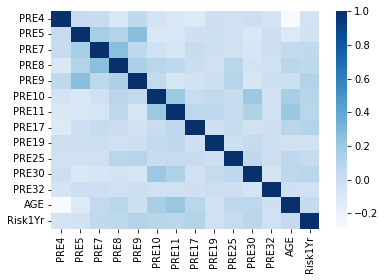

In [7]:
plt.figure(figsize = (6,4))
sns.heatmap(data.corr(),cmap = 'Blues', annot = False) 

Here, we make use of the Variance Inflation Factor to check the multicollinearity of data. To verify that multicollinearity does not exists; the <code>VIF</code> of every variable must not reach 10. If the <code>VIF</code> is equal to 1, there is no multicollinearity among factors, but if the <code>VIF</code> is greater than 1, the predictors may be highly correlated. A <code>VIF</code> between 5 and 10 indicates high correlation that may be problematic. If the <code>VIF</code> goes above 10, you can assume that the regression coefficients are poorly estimated due to multicollinearity. Statistically, and by theory, we should drop variables with high VIF. However,we care more about the predictions on how it affects the target variable due to the group of features rathen on each individual feature, then not removing multicollinearity may be a good option.

We can remove highly correlated variables or combine it into a single composite predictor if the first model simulation of the whole dataset will provide a poor model performance. If this happens, we can use **Principal Component Analysis** for dimensionality reduction. By transforming the original features into a new set of uncorrelated principal components, PCA can help to mitigate the effects of multicollinearity and reduce the VIF values in the data. This can improve the stability and interpretability of regression models, as well as reduce the risk of overfitting.

In [8]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['Features'] = data.columns
vif.sort_values(by = 'VIF', ascending = False)

VIF Features
12  15.782380      AGE
0   10.629432     PRE4
10   5.858002    PRE30
5    3.558516    PRE10
13   2.058501  Risk1Yr
6    1.324056    PRE11
3    1.317850     PRE8
1    1.286707     PRE5
4    1.217552     PRE9
2    1.193499     PRE7
7    1.117724    PRE17
9    1.047265    PRE25
8    1.012775    PRE19
11   1.010353    PRE32

The boxplot for most features are small unlike to <code>PRE4</code>, <code>PRE10</code>, and <code>AGE</code>. Features with no boxplots just indicates that these variables consists of categorical variables. There are also features that consists outliers - suggesting that these features may not follow a normal distribution. This statistical feature can further be observed in the probability density plot later. 

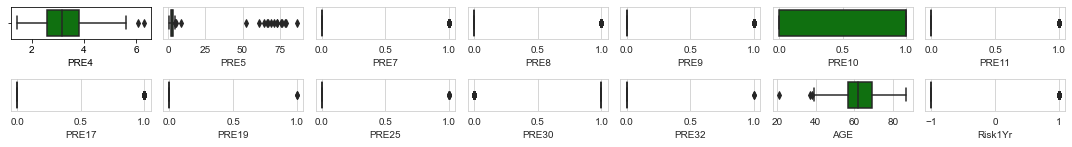

In [9]:
l = data.columns.values
number_of_columns = 7
number_of_rows = data.shape[0]
plt.figure(figsize = (15, 1 * number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data[l[i]], color = 'green', orient = 'v')
    plt.tight_layout()

All of the attributes from the Thoracic Surgery Risk Dataset does not follow normality. Nonetheless, Random Forests are robust to having data which are not normallu distributed. Therefore, we will neither use standardization nor normalization techniques.

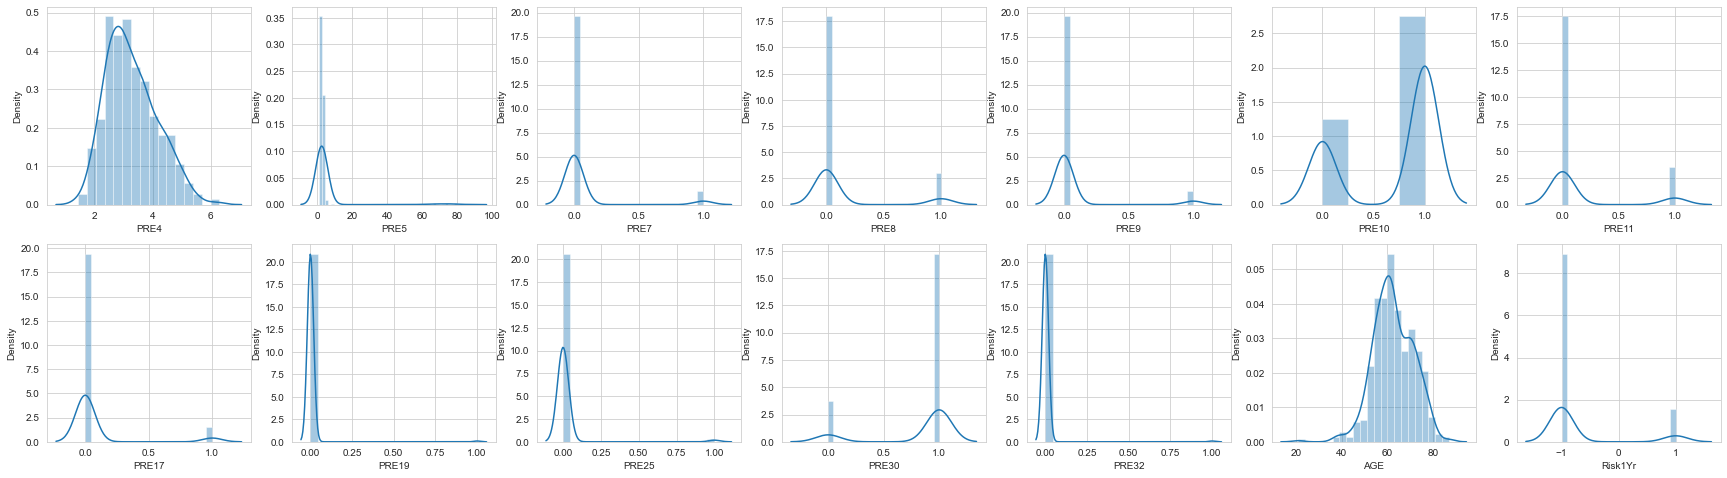

In [10]:
plt.figure(figsize = (30, 8))
for i in range(0, len(l)):
    plt.subplot(2, 7, i + 1)
    sns.set_style('whitegrid')
    sns.distplot(data[l[i]], kde = True) 
    plt.tight_layout

**The barplot below shows the the Thoracic Surgery dataset is imbalanced** (i.e., distribution of the classes is unequal, with one or more classes being underrepresented.). This may lead to biased or unreliable results if the Random Forests model is not trained to account for the imbalance in the data. One way to overcome this problem is to adopt **resampling** techniques to the training data. In this experiment, we can check the original dataset first if it can already provide good model performance on unseen dataset and may not resampling methods. If Random Forests produce poor performance, we may adopt resampling techniques, such as oversampling or underfitting. 

It is important to take note that we need to utilize Precision, Recall, and F1-score as our standard model performance metrics since the given dataset is imbalanced. 

Text(0.5, 1.0, 'Imbalanced dataset')

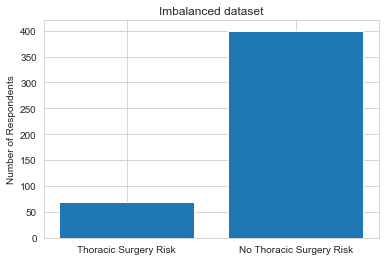

In [11]:
x = np.arange(2)
plt.bar(x, height = [len(y[y == 1]), len(y[y == -1])])
plt.xticks(x, ['Thoracic Surgery Risk', 'No Thoracic Surgery Risk'])
plt.ylabel('Number of Respondents')
plt.title('Imbalanced dataset')

In [14]:
def convert_binary(df, columns = ['Risk1Yr']):
    for column in columns:
        df[column] = df[column].apply(lambda x: -1 if x == 'F' else 1)
    return df

def load_thoracic(path = '../data/ThoraricSurgery.csv'):
    data = pd.read_csv(path)
    data = data[data.columns[2:]]
    data = data.drop(['PRE6', 'PRE14'], axis = 1)
    label_columns = data.columns[2:12]
    data = convert_binary(data, columns = ['Risk1Yr'])
    data = convert_binary(data, columns = label_columns)
    include_columns = data.columns[0:-1]
    X, y = data[include_columns], data['Risk1Yr']
    X, y = X.to_numpy(), y.to_numpy()
    y[y == 0] = -1
    return X, y, data

def split_data(X, y, pca_included = False, smote_included = False):
    random.seed(42)
    print('Model Assumptions:')
    if pca_included is True:
        print('\t The dataset used PCA for dimensionality reduction.')
        pca = PCA(n_components = 10)
        X = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    if smote_included is True:
        print('\t The dataset used SMOTE to rectify class imbalance.')
        smote = SMOTE(sampling_strategy = 'minority', k_neighbors = 5, random_state = 42)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    else:
        print('\t The dataset did NOT use SMOTE.')
        X_resampled, y_resampled = X_train, y_train 
    scaler  = StandardScaler()
    X_resampled = scaler.fit_transform(X_resampled)
    X_test  = scaler.transform(X_test)
    return X_resampled, y_resampled, X_test, y_test

def init_parameters():
    param_grid = { 
                'n_estimators': [10, 2000], 
                'criterion': ['gini', 'entropy'],
                'max_depth': np.arange(1, 20),
                'min_samples_split': np.arange(1, 5)
              }
    return param_grid

def validation(rsearch, X_test, y_test, cancer = False):
    predictions = rsearch.predict(X_test)
    class_names = ['Thoracic Surgery Risk', 'No Risk']
    if cancer is True:
        class_names = ['Cervix Cancer', 'No Cervix Cancer']
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions, target_names = class_names))
    return predictions

def train_randomforest(X_train, y_train, X_test, y_test, use_randomsearch = False, print_params = True, cancer = False):
    start = time()
    param_grid = init_parameters()
    if use_randomsearch is True:
        print('\t This model has been cross-validated through Random Search.')
        random.seed(42)
        rsearch = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                     param_distributions = param_grid, 
                                     cv = 10, n_iter = 10)
        rsearch.fit(X_train, y_train)
        if print_params is True:
            print(rsearch.best_params_)
        predictions = validation(rsearch, X_test, y_test)
    else:
        print('\t This model did NOT cross-validate through Random Search.')
        rsearch = RandomForestClassifier(criterion = 'gini', n_estimators = 100, 
                                         max_depth = 9, min_samples_split = 4)
        rsearch.fit(X_train, y_train)
        predictions = validation(rsearch, X_test, y_test, cancer = cancer)
    print(f"\t Fit and predict time: {np.round(time() - start, 3)} seconds")
    return predictions 

### Experiment 1: Classification using Random Forest Model

Our assumption only focuses on our original data using a simple random forest model. 

In [15]:
X, y, data = load_thoracic()
X_train, y_train, X_test, y_test = split_data(X, y, pca_included = False, smote_included = False)
predictions = train_randomforest(X_train, y_train, X_test, y_test, use_randomsearch = False)

Model Assumptions:
	 The dataset did NOT use SMOTE.
	 This model did NOT cross-validate through Random Search.
Confusion Matrix: 
[[75  0]
 [19  0]]
                       precision    recall  f1-score   support

Thoracic Surgery Risk       0.80      1.00      0.89        75
              No Risk       0.00      0.00      0.00        19

             accuracy                           0.80        94
            macro avg       0.40      0.50      0.44        94
         weighted avg       0.64      0.80      0.71        94

	 Fit and predict time: 0.261 seconds


**Results in experiment 1 suggest that the Random Forest model is not performing well, especially on the positive class, which could be due to the imbalanced dataset, absence of SMOTE or cross-validation, or other factors.**

We may want to use other techniques to improve the model. While only two features have high VIF (i.e., <code>PRE4</code> and <code>AGE</code>), we can check whether dimensionality reduction may provide a significant improvement to the Random Forest's model performance. 

### Experiment 2: Classification using Random Forest Model + Principal Component Analysis

This experiment only focuses on our PCA-based dataset using a simple random forest model. 

In [16]:
X, y, data = load_thoracic()
X_train, y_train, X_test, y_test = split_data(X, y, pca_included = True, smote_included = False)
predictions = train_randomforest(X_train, y_train, X_test, y_test, use_randomsearch = False)

Model Assumptions:
	 The dataset used PCA for dimensionality reduction.
	 The dataset did NOT use SMOTE.
	 This model did NOT cross-validate through Random Search.
Confusion Matrix: 
[[75  0]
 [19  0]]
                       precision    recall  f1-score   support

Thoracic Surgery Risk       0.80      1.00      0.89        75
              No Risk       0.00      0.00      0.00        19

             accuracy                           0.80        94
            macro avg       0.40      0.50      0.44        94
         weighted avg       0.64      0.80      0.71        94

	 Fit and predict time: 0.346 seconds


**Results in experiment 2 suggest that the PCA + Random Forest model did not produce any improvements at all.** We may need to adopt resampling techniques, such as oversampling, on the training data to provide a stronger inferential classification of the Random Forest model. 

### Experiment 3: Classification using Random Forest Model + SMOTE

This experiment uses oversampled (SMOTE) dataset with Random Search for hyperparameter tuning. Theory suggests that Random Search is more efficient in exploring the hyperparameter space because it does not have to consider all possible combinations of hyperparameters as Grid Search does. Instead, random search generates a random sample of hyperparameters from a specified distribution, allowing it to explore a wider range of hyperparameters in a more efficient manner.

In [17]:
X, y, data = load_thoracic()
X_train, y_train, X_test, y_test = split_data(X, y, pca_included = False, smote_included = True)
predictions = train_randomforest(X_train, y_train, X_test, y_test, use_randomsearch = True)

Model Assumptions:
	 The dataset used SMOTE to rectify class imbalance.
	 This model has been cross-validated through Random Search.
{'n_estimators': 2000, 'min_samples_split': 2, 'max_depth': 15, 'criterion': 'entropy'}
Confusion Matrix: 
[[69  6]
 [18  1]]
                       precision    recall  f1-score   support

Thoracic Surgery Risk       0.79      0.92      0.85        75
              No Risk       0.14      0.05      0.08        19

             accuracy                           0.74        94
            macro avg       0.47      0.49      0.46        94
         weighted avg       0.66      0.74      0.70        94

	 Fit and predict time: 212.491 seconds


### Experiment 4.1: Classification using Random Forest Model + SMOTE + PCA + Random Search

This experiment uses oversampled (SMOTE) dataset with Random Search for hyperparameter tuning. 

In [18]:
X, y, data = load_thoracic()
X_train, y_train, X_test, y_test = split_data(X, y, pca_included = True, smote_included = True)
predictions = train_randomforest(X_train, y_train, X_test, y_test, use_randomsearch = True)

Model Assumptions:
	 The dataset used PCA for dimensionality reduction.
	 The dataset used SMOTE to rectify class imbalance.
	 This model has been cross-validated through Random Search.
{'n_estimators': 2000, 'min_samples_split': 3, 'max_depth': 13, 'criterion': 'entropy'}
Confusion Matrix: 
[[67  8]
 [19  0]]
                       precision    recall  f1-score   support

Thoracic Surgery Risk       0.78      0.89      0.83        75
              No Risk       0.00      0.00      0.00        19

             accuracy                           0.71        94
            macro avg       0.39      0.45      0.42        94
         weighted avg       0.62      0.71      0.66        94

	 Fit and predict time: 229.931 seconds


While there are minimal improvements to Random Forests' performance to Thoracic Surgery Risk Dataset, it does not offer high-quality results. We can use other hyperparameters of Random Forest to see if it can be improved. 

However, Random Forest may not be a suitable classification model for this dataset. Random Forest assumes that instances in the dataset are independent of each other (i.e., independent and identically distributed (IID)), meaning that the presence or absence of one instance does not influence the presence or absence of another instance. If there is a dependence between the instances, it can result in overfitting or over-representation of certain features or samples in the model, leading to poor performance.

To verify the sample independences, we utilize the Chi-Square Test of Independence to verify whether presence of influence to another instance. 

In [19]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

X, y, df = load_thoracic()
n_cols = df.shape[1]
dep_pairs = 0
for i in range(n_cols):
    for j in range(i+1, n_cols):
        ct = pd.crosstab(df.iloc[:,i], df.iloc[:,j])
        chi2, p, dof, expected = chi2_contingency(ct)
        if p < 0.05:
            dep_pairs += 1
print('Number of dependent pairs of variables: ', dep_pairs)

print('Example pairs of feature: ')
column1 = df.columns[0]
column2 = df.columns[1]

contingency_table = pd.crosstab(data[column1], data[column2])
stat, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print(f"\t Reject the null hypothesis, the variables {column1} and {column2} are dependent.")
else:
    print(f"\t Fail to reject the null hypothesis, the variables {column1} and {column2} are independent.")

Number of dependent pairs of variables:  20
Example pairs of feature: 
	 Reject the null hypothesis, the variables PRE4 and PRE5 are dependent.


Unfortunately, majority of the features in the Thoracic Surgery dataset has dependence of instances. Let's try to normalize the dataset if there are any improvements.

In [36]:
X, y, data = load_thoracic()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

X_train, y_train, X_test, y_test = split_data(X, y, pca_included = True, smote_included = True)
predictions = train_randomforest(X_train, y_train, X_test, y_test, use_randomsearch = True)

Model Assumptions:
	 The dataset used PCA for dimensionality reduction.
	 The dataset used SMOTE to rectify class imbalance.
	 This model has been cross-validated through Random Search.
{'n_estimators': 2000, 'min_samples_split': 2, 'max_depth': 10, 'criterion': 'gini'}
Confusion Matrix: 
[[65 10]
 [16  3]]
                       precision    recall  f1-score   support

Thoracic Surgery Risk       0.80      0.87      0.83        75
              No Risk       0.23      0.16      0.19        19

             accuracy                           0.72        94
            macro avg       0.52      0.51      0.51        94
         weighted avg       0.69      0.72      0.70        94

	 Fit and predict time: 155.626 seconds


### Experiment 4.2: Classification using **Decision Tree** + SMOTE + PCA + Random Search

In [35]:
def decision_tree_classifier(X_train, y_train, cv = 5, scoring = 'accuracy'):
    print('Decision Tree Classifier')
    start = time()
    param_grid = {'criterion': ['gini', 'entropy'],
                  'max_depth': np.arange(1, 21),
                  'min_samples_split': np.arange(2, 11),
                  'min_samples_leaf': np.arange(1, 11)}
    
    dt = DecisionTreeClassifier()
    grid_search = GridSearchCV(dt, param_grid, cv = cv, scoring = scoring)
    grid_search.fit(X_train, y_train)
    predictions = validation(grid_search, X_test, y_test)
    print(f"\t Fit and predict time: {np.round(time() - start, 3)} seconds")

X, y, data = load_thoracic()
X_train, y_train, X_test, y_test = split_data(X, y, pca_included = True, smote_included = True)
decision_tree_classifier(X_train, y_train, cv = 5, scoring = 'precision')

Model Assumptions:
	 The dataset used PCA for dimensionality reduction.
	 The dataset used SMOTE to rectify class imbalance.
Decision Tree Classifier
Confusion Matrix: 
[[61 14]
 [11  8]]
                       precision    recall  f1-score   support

Thoracic Surgery Risk       0.85      0.81      0.83        75
              No Risk       0.36      0.42      0.39        19

             accuracy                           0.73        94
            macro avg       0.61      0.62      0.61        94
         weighted avg       0.75      0.73      0.74        94

	 Fit and predict time: 145.702 seconds


Random Forest model performed slightly better than the Decision Tree model. The Random Forest model achieved an accuracy of 0.74, compared to the Decision Tree model's accuracy of 0.71 (Experiment 3). Additionally, the Random Forest model had a higher precision, recall, and f1-score for the 'Thoracic Surgery Risk' class, indicating that it was better at correctly identifying instances of that class. However, both models performed poorly in terms of precision, recall, and f1-score for the 'No Risk' class, with the Decision Tree model performing particularly badly. **This suggests that both models are struggling to correctly identify instances of this class.** While the Random Forest model performed slightly better in some metrics, the difference was not significant, and both models have room for improvement. 

## Cervical Cancer Dataset

We extend the Random Forest simulation to other datasets and observe if Random Forest, under different experiments, can provide a better model performance. Results in the previous dataset have shown that there is little improvements to the classification results. The dataset for this simulaton is the Cervical Cancer Dataset, which has been used from the previous assignment (i.e., Adaptive Boosting). Previous results have shown Adaptive Boosting can greatly classify the Cervical Cancer dataset, especially to weak SVM and Decision Tree. Here, we try to observe if Random Forest can also produce good results.  

### Experiment 5: Classification of Cervical Cancer Dataset using Random Forest Model

In [21]:
data = pd.read_csv('../data/sobar-72.csv', sep = ',', header = 0)
X = data.iloc[:, 0:19].to_numpy()
y = data.iloc[:, 19].to_numpy()
X_train, y_train, X_test, y_test = split_data(X, y, pca_included = False, smote_included = False)
predictions = train_randomforest(X_train, y_train, X_test, y_test, use_randomsearch = False, cancer = True)

Model Assumptions:
	 The dataset did NOT use SMOTE.
	 This model did NOT cross-validate through Random Search.
Confusion Matrix: 
[[8 0]
 [3 4]]
                  precision    recall  f1-score   support

   Cervix Cancer       0.73      1.00      0.84         8
No Cervix Cancer       1.00      0.57      0.73         7

        accuracy                           0.80        15
       macro avg       0.86      0.79      0.78        15
    weighted avg       0.85      0.80      0.79        15

	 Fit and predict time: 0.26 seconds


**Results in Experiment 5 have shown that Random Forest produce good model performance to the Cervical Cancer Dataset.** This result can be greatly improved if we can use other techniques to address its limitations. 

### Experiment 6: Classification of Cervical Cancer Dataset using Random Forest Model + PCA + SMOTE + Random Search

In [22]:
data = pd.read_csv('../data/sobar-72.csv', sep = ',', header = 0)
X = data.iloc[:, 0:19].to_numpy()
y = data.iloc[:, 19].to_numpy()
X_train, y_train, X_test, y_test = split_data(X, y, pca_included = True, smote_included = True)
predictions = train_randomforest(X_train, y_train, X_test, y_test, use_randomsearch = True)

Model Assumptions:
	 The dataset used PCA for dimensionality reduction.
	 The dataset used SMOTE to rectify class imbalance.
	 This model has been cross-validated through Random Search.
{'n_estimators': 2000, 'min_samples_split': 3, 'max_depth': 13, 'criterion': 'gini'}
Confusion Matrix: 
[[8 0]
 [0 7]]
                       precision    recall  f1-score   support

Thoracic Surgery Risk       1.00      1.00      1.00         8
              No Risk       1.00      1.00      1.00         7

             accuracy                           1.00        15
            macro avg       1.00      1.00      1.00        15
         weighted avg       1.00      1.00      1.00        15

	 Fit and predict time: 136.408 seconds


The confusion matrix shows that the model has achieved 100% accuracy, with no false positive or false negatives. This is reflected in the precision, recall, and f1-score, which are all 1.00. The results suggest that Random Forest + PA + SMOTE + Random Search can improved the model performance from Experiment 5.

### Experiment 7: Classification of Cervical Cancer Dataset using Decision Tree + PCA + SMOTE + Random Search

In [37]:
data = pd.read_csv('../data/sobar-72.csv', sep = ',', header = 0)
X = data.iloc[:, 0:19].to_numpy()
y = data.iloc[:, 19].to_numpy()
X_train, y_train, X_test, y_test = split_data(X, y, pca_included = True, smote_included = True)
decision_tree_classifier(X_train, y_train, cv = 5, scoring = 'precision')

Model Assumptions:
	 The dataset used PCA for dimensionality reduction.
	 The dataset used SMOTE to rectify class imbalance.
Decision Tree Classifier
Confusion Matrix: 
[[8 0]
 [1 6]]
                       precision    recall  f1-score   support

Thoracic Surgery Risk       0.89      1.00      0.94         8
              No Risk       1.00      0.86      0.92         7

             accuracy                           0.93        15
            macro avg       0.94      0.93      0.93        15
         weighted avg       0.94      0.93      0.93        15

	 Fit and predict time: 77.773 seconds


The Confusion Matrix for both models show that both were able to correctly classify all instances of the 'Thoracic Surgery Risk' class, with precision, recall, and F1-score all equal to 1.00 for the Random Forest model and 0.89, 1.00, and 0.94 for the Decision Tree model. For the 'No Risk' class, the Random Forest model was able to correctly classify all 7 instances, while the Decision Tree model made 1 mistake, misclassifying 1 instance as 'Thoracic Surgery Risk'. However, the Decision Tree model had a higher precision, recall, and f1-score for the 'No Risk' class compared to the Random Forest model. It's possible that the Random Forest model was better able to capture the complex relationships in the data, leading to its higher performance compared to the Decision Tree model, since Random Forest combines multiple decision trees to make a prediction, which reduces overfitting, a common problem with decision trees.